In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Let´s first see the 2 files

In [2]:
data1 = pd.read_csv('measurements.csv')
data2 = pd.read_excel('measurements2.xlsx')
data1.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


Because the data are similar we can concat them.

In [4]:
data_3 = pd.concat([data1, data2], axis = 0)

data_3

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


Now lets see what we can clean from the dataset

In [5]:
null_values = data_3.isnull().sum()
print(null_values)

distance           0
consume            0
speed              0
temp_inside       24
temp_outside       0
specials         590
gas_type           0
AC                 0
rain               0
sun                0
refill liters    750
refill gas       750
dtype: int64


In [6]:
columns_drop = ['specials', 'refill liters', 'refill gas']
data_drop = data_3.drop(columns=columns_drop)

In [7]:
data_clean = data_drop.dropna()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      752 non-null    object
 1   consume       752 non-null    object
 2   speed         752 non-null    int64 
 3   temp_inside   752 non-null    object
 4   temp_outside  752 non-null    int64 
 5   gas_type      752 non-null    object
 6   AC            752 non-null    int64 
 7   rain          752 non-null    int64 
 8   sun           752 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 58.8+ KB


In [10]:
#Change the type of columns
convert_columns_float= ['distance', 'consume','temp_inside', 'temp_outside']

data_clean[convert_columns_float] = data_clean[convert_columns_float].replace(',', '.', regex=True).astype(float)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      752 non-null    float64
 1   consume       752 non-null    float64
 2   speed         752 non-null    int64  
 3   temp_inside   752 non-null    float64
 4   temp_outside  752 non-null    float64
 5   gas_type      752 non-null    object 
 6   AC            752 non-null    int64  
 7   rain          752 non-null    int64  
 8   sun           752 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 58.8+ KB


C:\Users\André Torres\AppData\Local\Temp\ipykernel_4280\3468819707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[convert_columns_float] = data_clean[convert_columns_float].replace(',', '.', regex=True).astype(float)


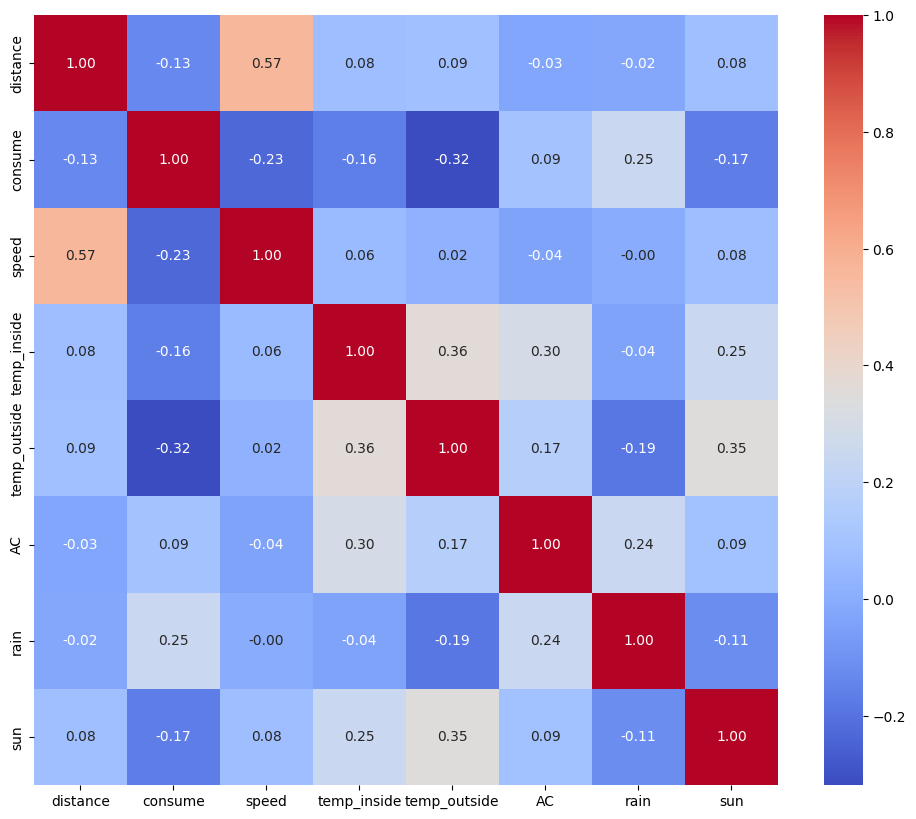

In [19]:
columns_heatmap = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun']

plt.figure(figsize=(12, 10))
sns.heatmap(data_clean[columns_heatmap].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Din´t get any insight from these. 

So let´s try to see a different kind of visualizations relating the type of gas with variables that we can control.

<Figure size 1000x800 with 0 Axes>

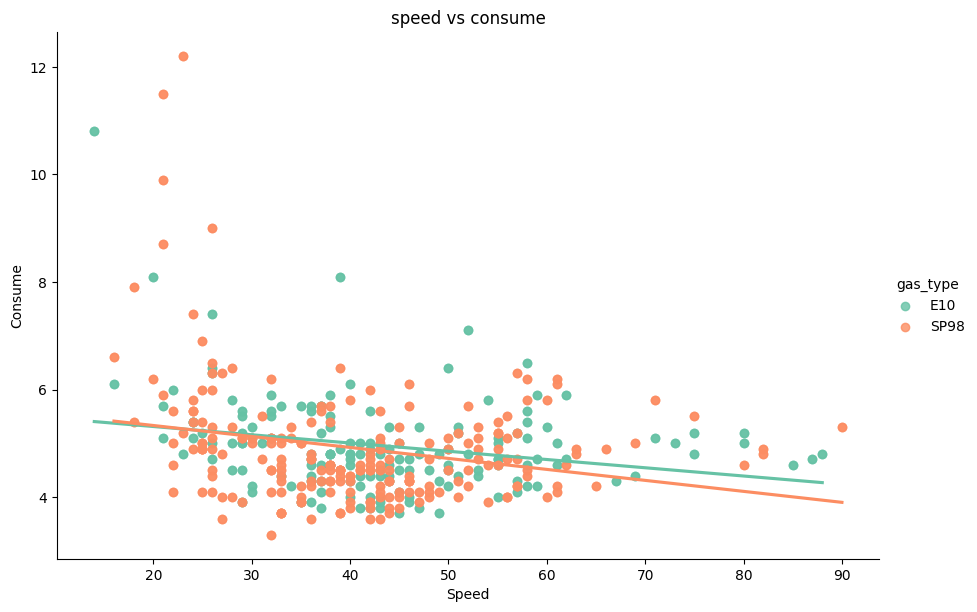

In [38]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='speed', y='consume', hue='gas_type', data=data_clean, palette='Set2', height=6, aspect=1.5, ci=None)
plt.title('speed vs consume')
plt.xlabel('Speed')
plt.ylabel('Consume')
plt.show()

<Figure size 1000x800 with 0 Axes>

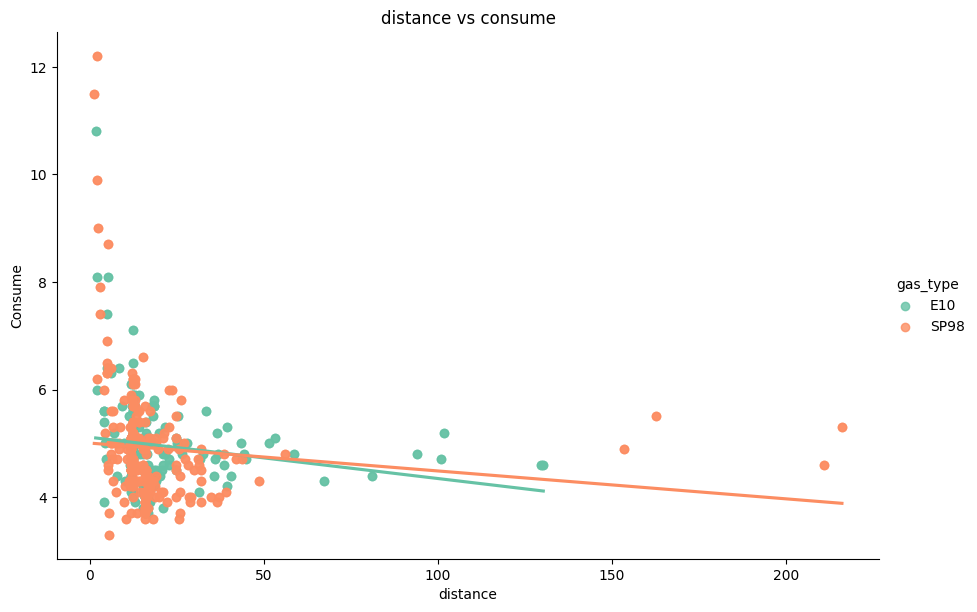

In [47]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='distance', y='consume', hue='gas_type', data=data_clean, palette='Set2', height=6, aspect=1.5, ci=None)
plt.title('distance vs consume')
plt.xlabel('distance')
plt.ylabel('Consume')
plt.show()

<Figure size 1000x800 with 0 Axes>

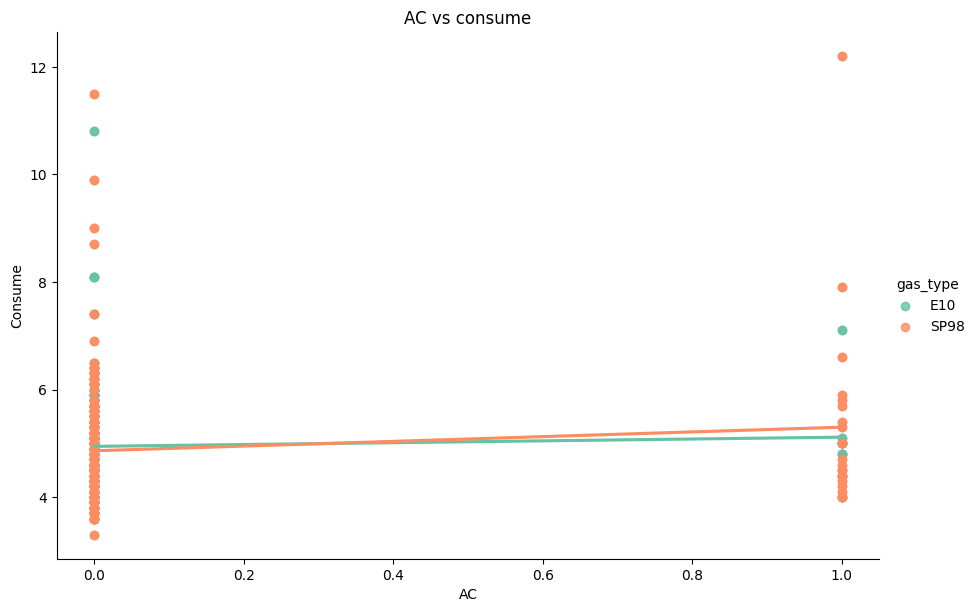

In [39]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='AC', y='consume', hue='gas_type', data=data_clean, palette='Set2', height=6, aspect=1.5, ci=None)
plt.title('AC vs consume')
plt.xlabel('AC')
plt.ylabel('Consume')
plt.show()

<Figure size 1200x800 with 0 Axes>

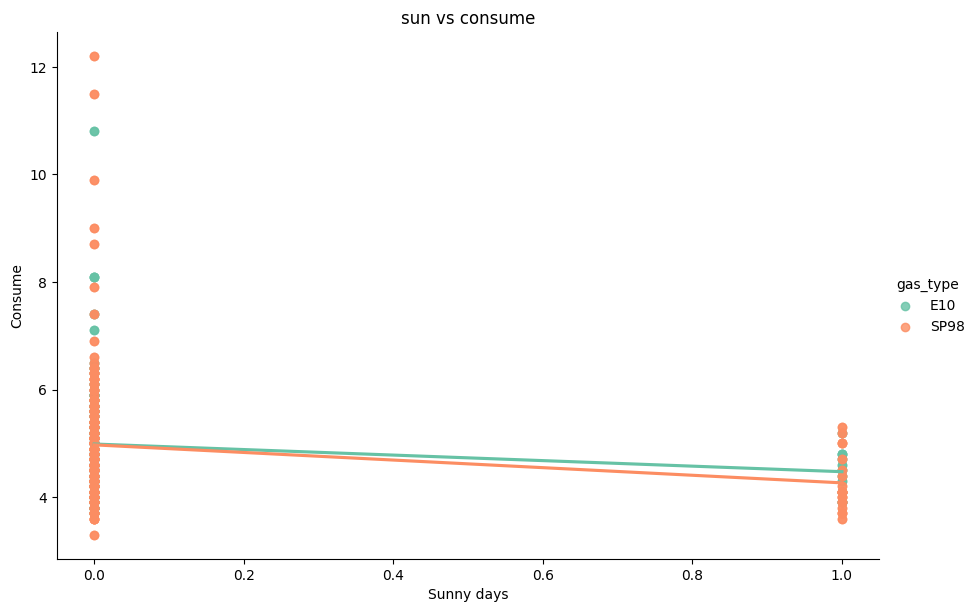

In [41]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='sun', y='consume', hue='gas_type', data=data_clean, palette='Set2', height=6, aspect=1.5, ci=None)
plt.title('sun vs consume')
plt.xlabel('Sunny days')
plt.ylabel('Consume')
plt.show()

<Figure size 1200x800 with 0 Axes>

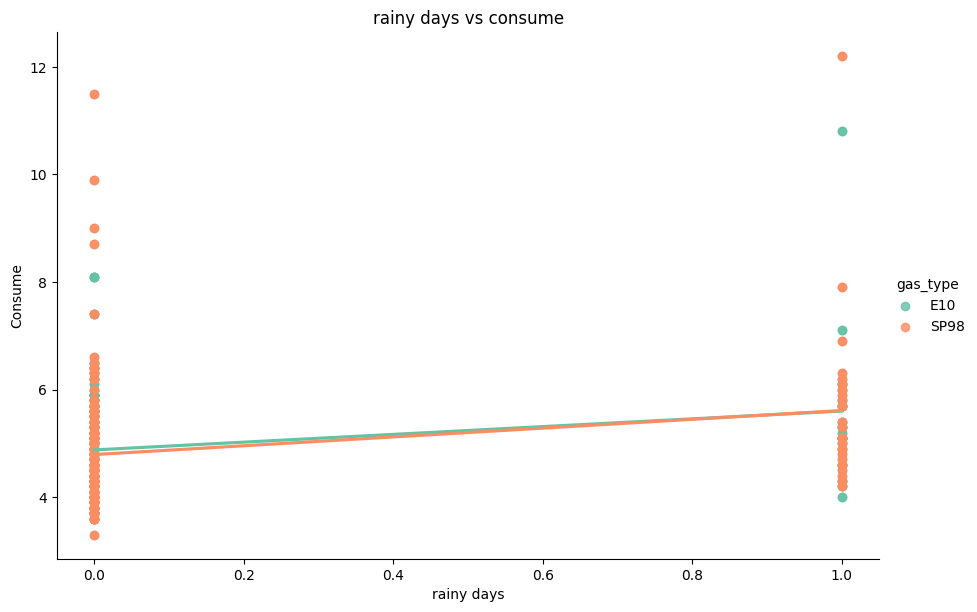

In [43]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='rain', y='consume', hue='gas_type', data=data_clean, palette='Set2', height=6, aspect=1.5, ci=None)
plt.title('rainy days vs consume')
plt.xlabel('rainy days')
plt.ylabel('Consume')
plt.show()

<Figure size 1200x800 with 0 Axes>

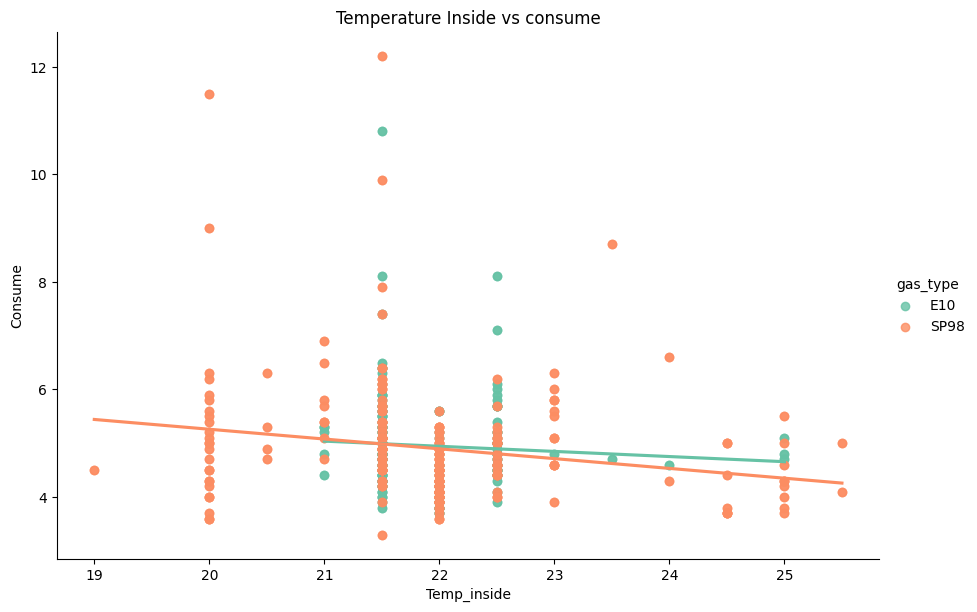

In [44]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='temp_inside', y='consume', hue='gas_type', data=data_clean, palette='Set2', height=6, aspect=1.5, ci=None)
plt.title('Temperature Inside vs consume')
plt.xlabel('Temp_inside')
plt.ylabel('Consume')
plt.show()

<Figure size 1200x800 with 0 Axes>

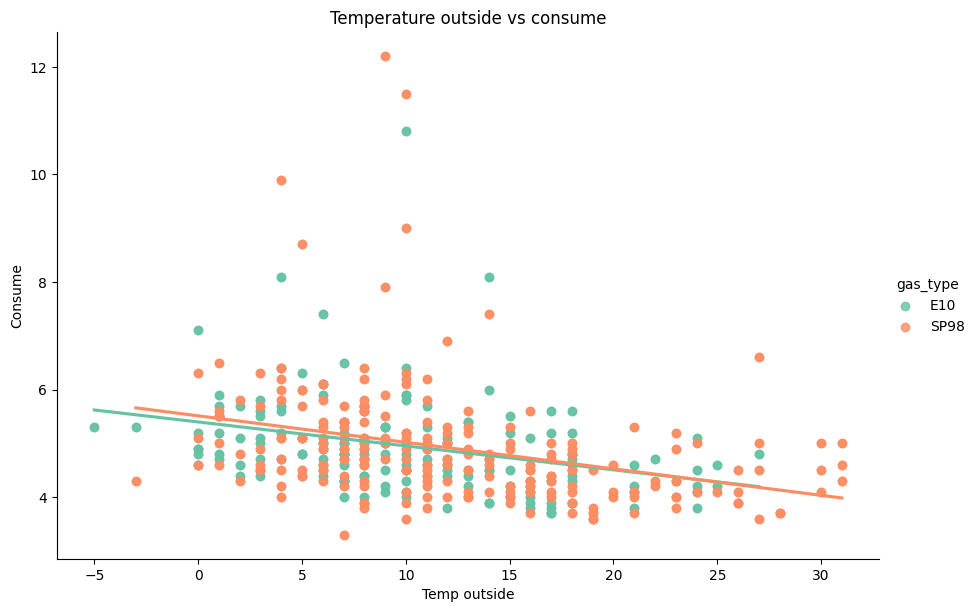

In [45]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='temp_outside', y='consume', hue='gas_type', data=data_clean, palette='Set2', height=6, aspect=1.5, ci=None)
plt.title('Temperature outside vs consume')
plt.xlabel('Temp outside')
plt.ylabel('Consume')
plt.show()

we can conclude that in we will consume more E10 type of gas in:
Higher speeds, sunny days, and with higher temperatures inside the vehicle.

And we will consume more SP98 turning on the AC.
Also in distance SP98 seems to have more consume of gas but we have a lot of points in small distances 

Lets use a Linear Regression.

In [61]:
data_clean

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12.0,E10,0,0,0
1,12.0,4.2,30,21.5,13.0,E10,0,0,0
2,11.2,5.5,38,21.5,15.0,E10,0,0,0
3,12.9,3.9,36,21.5,14.0,E10,0,0,0
4,18.5,4.5,46,21.5,15.0,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,SP98,0,0,0
384,16.1,4.3,38,25.0,31.0,SP98,1,0,0
385,16.0,3.8,45,25.0,19.0,SP98,0,0,0
386,15.4,4.6,42,25.0,31.0,SP98,1,0,0
